In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
%matplotlib inline

# Teledoc
knsl = pdr.get_data_yahoo('KNSL','2019-05-31')
knsl.drop('Adj Close', axis=1, inplace=True)
knsl.head()

,High,Low,Open,Close,Volume
Date,,,,,
2019-05-31,84.690002,81.449997,83.120003,83.790001,120500.0
2019-06-03,87.220001,83.699997,84.070000,87.120003,109500.0
2019-06-04,87.870003,85.739998,87.330002,86.320000,117200.0
2019-06-05,88.980003,85.940002,86.489998,86.379997,62900.0
2019-06-06,87.540001,86.320000,86.430000,87.519997,46800.0


In [2]:
knsl['3-day'] = knsl['Close'].rolling(3).mean()
knsl['9-day'] = knsl['Close'].rolling(9).mean()
knsl['21-day'] = knsl['Close'].rolling(21).mean()
knsl['Change'] = np.log(knsl.Close / knsl.Close.shift())
knsl.tail()

,High,Low,Open,Close,Volume,3-day,9-day,21-day,Change
Date,,,,,,,,,
2021-05-28,166.770004,165.190002,165.470001,166.460007,65200.0,165.503337,163.038890,163.712381,0.005361
2021-06-01,167.000000,162.009995,167.000000,162.080002,75500.0,164.703339,163.503335,163.144286,-0.026665
2021-06-02,162.535004,160.000000,162.279999,162.199997,129400.0,163.580002,163.817780,162.711905,0.000740
2021-06-03,162.199997,160.000000,161.330002,160.449997,96100.0,161.576665,163.534446,162.252858,-0.010848
2021-06-04,161.589996,159.684998,160.500000,160.979996,77100.0,161.209997,163.295556,161.932381,0.003298


In [3]:
knsl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 508 entries, 2019-05-31 to 2021-06-04
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   High    508 non-null    float64
 1   Low     508 non-null    float64
 2   Open    508 non-null    float64
 3   Close   508 non-null    float64
 4   Volume  508 non-null    float64
 5   3-day   506 non-null    float64
 6   9-day   500 non-null    float64
 7   21-day  488 non-null    float64
 8   Change  507 non-null    float64
dtypes: float64(9)
memory usage: 39.7 KB


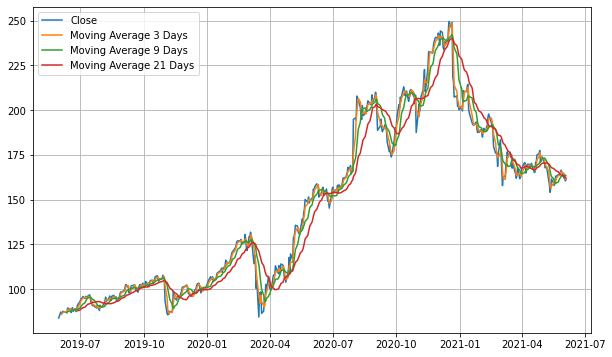

In [4]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(knsl['Close'],label='Close')
plt.plot(knsl['3-day'],label='Moving Average 3 Days')
plt.plot(knsl['9-day'],label='Moving Average 9 Days')
plt.plot(knsl['21-day'],label='Moving Average 21 Days')
plt.legend(loc=2)

## Zoom in on the changing period

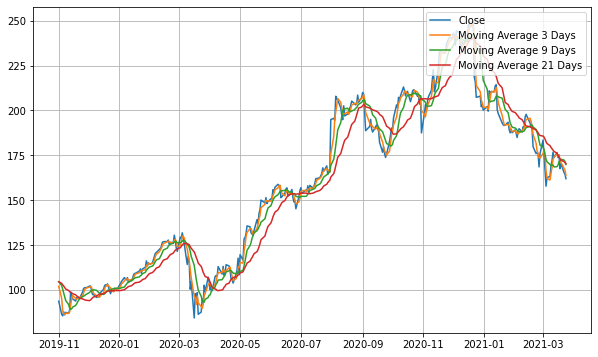

In [5]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(knsl['Close'][-400:-50],label='Close')
plt.plot(knsl['3-day'][-400:-50],label='Moving Average 3 Days')
plt.plot(knsl['9-day'][-400:-50],label='Moving Average 9 Days')
plt.plot(knsl['21-day'][-400:-50],label='Moving Average 21 Days')
plt.legend(loc=1)

## Zoom in from the beginning to -200 days of the DataFrame

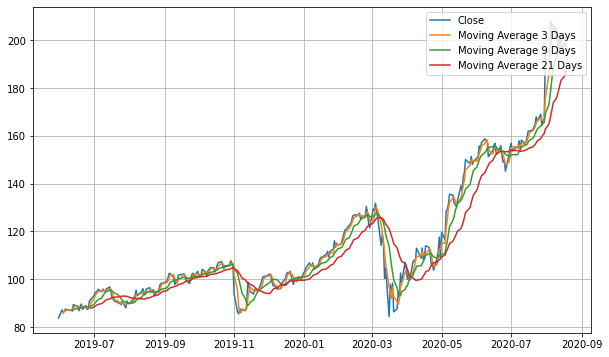

In [6]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(knsl['Close'][:-200],label='Close')
plt.plot(knsl['3-day'][:-200],label='Moving Average 3 Days')
plt.plot(knsl['9-day'][:-200],label='Moving Average 9 Days')
plt.plot(knsl['21-day'][:-200:],label='Moving Average 21 Days')
plt.legend(loc=1)

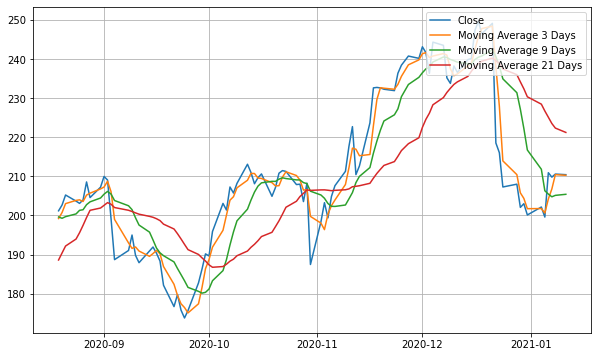

In [7]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(knsl['Close'][-200:-100],label='Close')
plt.plot(knsl['3-day'][-200:-100],label='Moving Average 3 Days')
plt.plot(knsl['9-day'][-200:-100],label='Moving Average 9 Days')
plt.plot(knsl['21-day'][-200:-100],label='Moving Average 21 Days')
plt.legend(loc=1)

In [8]:
# When the faster moving average is moving above the slower one, indicates time to buy
knsl['position-9-21'] = np.where(knsl['9-day'] > knsl['21-day'], 1,0)
# When the faster moving average is moving below the slower one, indicates time to sell
knsl['position-9-21'] = np.where(knsl['9-day'] < knsl['21-day'],-1,knsl['position-9-21'])

<AxesSubplot:xlabel='Date'>

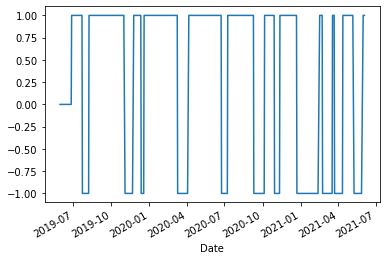

In [9]:
knsl['position-9-21'].plot()

<AxesSubplot:xlabel='Date'>

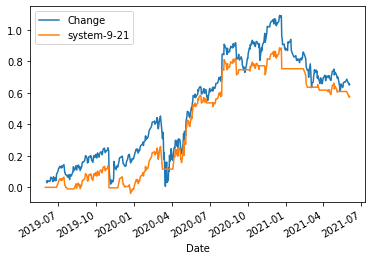

In [10]:
# Whether we are making money with this system
knsl['system-9-21'] = np.where(knsl['position-9-21'] > 0, knsl['position-9-21']* knsl['Change'],0)
knsl[['Change','system-9-21']].cumsum().plot()

In [11]:
# When the faster moving average is moving above the slower one, indicates time to buy
knsl['position-3-9'] = np.where(knsl['3-day'] > knsl['9-day'], 1,0)
# When the faster moving average is moving below the slower one, indicates time to sell
knsl['position-3-9'] = np.where(knsl['3-day'] < knsl['9-day'],-1,knsl['position-3-9'])


<AxesSubplot:xlabel='Date'>

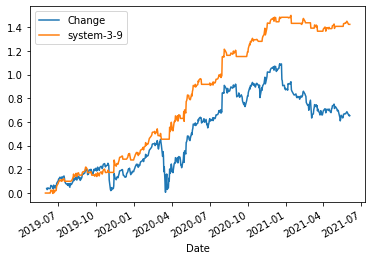

In [12]:
# Whether we are making money with this system
knsl['system-3-9'] = np.where(knsl['position-3-9'] > 0, knsl['position-3-9']* knsl['Change'],0)
knsl[['Change','system-3-9']].cumsum().plot()

<AxesSubplot:xlabel='Date'>

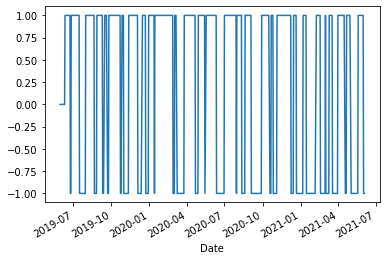

In [13]:
knsl['position-3-9'].plot()

In [14]:
knsl['position-3-9'].diff()[knsl['position-3-9'].diff() != 0].index.values

array(['2019-05-31T00:00:00.000000000', '2019-06-12T00:00:00.000000000',
       '2019-06-25T00:00:00.000000000', '2019-06-27T00:00:00.000000000',
       '2019-07-17T00:00:00.000000000', '2019-08-01T00:00:00.000000000',
       '2019-08-22T00:00:00.000000000', '2019-08-28T00:00:00.000000000',
       '2019-09-11T00:00:00.000000000', '2019-09-16T00:00:00.000000000',
       '2019-09-23T00:00:00.000000000', '2019-09-26T00:00:00.000000000',
       '2019-10-24T00:00:00.000000000', '2019-10-28T00:00:00.000000000',
       '2019-11-01T00:00:00.000000000', '2019-11-13T00:00:00.000000000',
       '2019-12-05T00:00:00.000000000', '2019-12-16T00:00:00.000000000',
       '2019-12-24T00:00:00.000000000', '2019-12-31T00:00:00.000000000',
       '2020-01-14T00:00:00.000000000', '2020-01-15T00:00:00.000000000',
       '2020-02-28T00:00:00.000000000', '2020-03-03T00:00:00.000000000',
       '2020-03-09T00:00:00.000000000', '2020-03-26T00:00:00.000000000',
       '2020-04-22T00:00:00.000000000', '2020-04-29

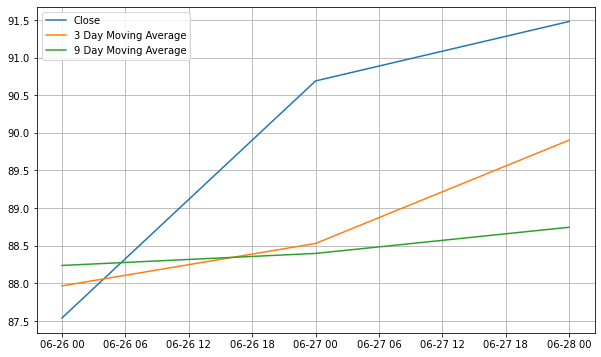

In [15]:
start = '2019-06-26'
finish = '2019-06-28'
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(knsl['Close'][start:finish],label='Close')
plt.plot(knsl['3-day'][start:finish],label='3 Day Moving Average')
plt.plot(knsl['9-day'][start:finish],label='9 Day Moving Average')
plt.legend(loc=2)

## Calculate the Volitility

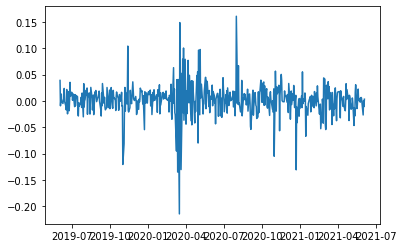

In [16]:
plt.plot(knsl.Change)

In [17]:
knsl['Volatility'] = knsl.Change.rolling(21).std().shift()

<AxesSubplot:xlabel='Date'>

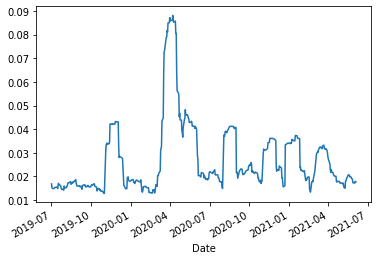

In [18]:
knsl.Volatility.plot()

## Prepare data for DGIM processing

In [19]:
bit_depth = 16
num_buckets = 5
knsl_list = knsl['Close'].tolist()
knsl_3day_list = knsl['3-day'].tolist()
knsl_9day_list = knsl['9-day'].tolist()
knsl_21day_list = knsl['21-day'].tolist()
knsl_list_bin = [ np.array(list(np.binary_repr(round(elem)).zfill(bit_depth))).astype(np.int8) for elem in knsl_list ]
print(knsl_list[0],knsl_list_bin[0], len(knsl_list_bin))

83.79000091552734 [0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0] 508


In [20]:
from ipynb.fs.full.DGIMMovingAverage import *

## 3, 9, 21 day moving average with DGIM

[0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0]
0 nan 28.0 nan
1 nan 57.0 nan
2 85.7433344523112 57.666666666666664 -32.74501506733476
3 86.6066665649414 57.666666666666664 -33.415441381263975
4 86.73999786376953 60.0 -30.827759421629608
5 87.08999888102214 60.333333333333336 -30.723005961043103
6 87.27999877929688 60.666666666666664 -30.491902480345804
7 87.14999898274739 58.0 -33.448077249568364
8 87.10999806722005 58.0 -33.41751660326841
9 87.90999857584636 60.666666666666664 -30.99002656185336
10 88.61666615804036 61.333333333333336 -30.788037970249857
11 88.98333231608073 59.333333333333336 -33.32084583821454
12 88.14999898274739 61.333333333333336 -30.42162899475765
13 87.98666636149089 61.333333333333336 -30.292468314065953
14 88.40333302815755 62.0 -29.86689768783691
15 88.59666697184245 62.0 -30.01994079562308
16 88.67666625976562 62.0 -30.083073016773255
17 87.93000030517578 60.666666666666664 -31.00572448980684
18 87.96666717529297 61.333333333333336 -30.27662033493533
19 88.5300013224283

279 155.7733357747396 104.33333333333333 -33.02234120208643
280 156.86666870117188 105.33333333333333 -32.85167957892228
281 156.49000040690103 105.66666666666667 -32.47704876227549
282 157.55667114257812 105.66666666666667 -32.934184315784705
283 157.92667134602866 106.0 -32.88024176249089
284 159.6433359781901 116.33333333333333 -27.129226772593643
285 161.1433359781901 117.66666666666667 -26.98012241561622
286 162.18000284830728 108.0 -33.407326363771105
287 162.72333780924478 109.33333333333333 -32.81029334495265
288 163.66000366210938 110.33333333333333 -32.583813476427444
289 165.51333618164062 112.33333333333333 -32.130343134371685
290 166.336669921875 113.0 -32.06549099902394
291 167.74333699544272 114.33333333333333 -31.840313075183694
292 166.5300038655599 113.0 -32.144359948958396
293 166.70333862304688 113.33333333333333 -32.01495886677767
294 165.64000447591147 111.0 -32.987202969955
295 175.8133341471354 132.66666666666666 -24.541180388718402
296 185.4800008138021 143.0 -

464 167.70000203450522 114.66666666666667 -31.623932453457357
465 169.5233357747396 113.66666666666667 -32.9492508230811
466 168.60333760579428 115.33333333333333 -31.594869371453214
467 167.74666849772134 114.33333333333333 -31.841666748280954
468 167.57000223795572 114.33333333333333 -31.76980855381521
469 169.18000284830728 113.33333333333333 -33.010207219967974
470 169.16000366210938 113.33333333333333 -33.00228725478611
471 168.85333760579428 113.0 -33.078018117823476
472 169.0433349609375 113.0 -33.15323551436558
473 169.19000244140625 113.0 -33.21118365777312
474 168.03333536783853 114.33333333333333 -31.957945676047892
475 166.35333760579428 112.66666666666667 -32.272674363978396
476 167.1100056966146 113.33333333333333 -32.1804024475422
477 169.0666707356771 115.33333333333333 -31.782336026686043
478 172.30667114257812 115.33333333333333 -33.06507950705009
479 173.96666971842447 120.66666666666667 -30.638054483670384
480 176.0500030517578 122.66666666666667 -30.322826162858238

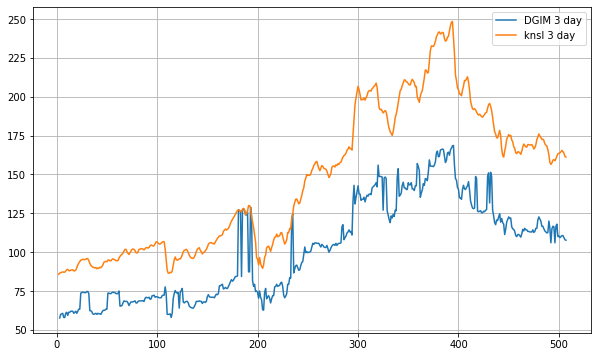

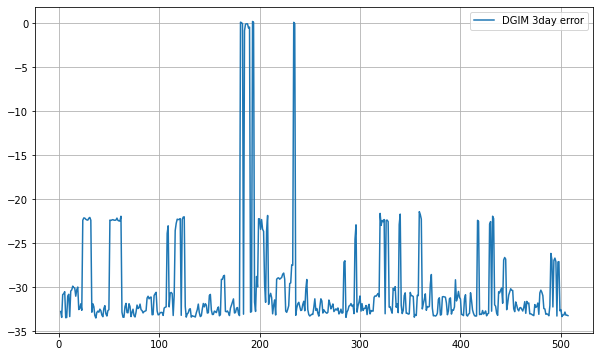

In [21]:
print(knsl_list_bin[0])
dgim_3day = DGIMMovingAverage(knsl_list_bin, 3, num_buckets, bit_depth, knsl_3day_list, False)
knsl['3-day-dgim'] = dgim_3day.mov_avg
knsl.tail()

plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(range(len(dgim_3day.mov_avg)), dgim_3day.mov_avg, label = "DGIM 3 day")
plt.plot(range(len(dgim_3day.mov_avg)), knsl_3day_list, label = "knsl 3 day")
plt.legend(loc=1)

plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(range(len(dgim_3day.error)), dgim_3day.error, label = "DGIM 3day error")
plt.legend(loc=1)

0 nan 9.333333333333334 nan
1 nan 19.0 nan
2 nan 19.22222222222222 nan
3 nan 28.555555555555557 nan
4 nan 38.333333333333336 nan
5 nan 48.0 nan
6 nan 48.666666666666664 nan
7 nan 57.888888888888886 nan
8 86.64777713351779 67.33333333333333 -22.290755099720954
9 87.26555464002821 67.88888888888889 -22.204254394610082
10 87.5022210015191 67.88888888888889 -22.41466775145024
11 87.72777642144098 68.11111111111111 -22.360837251923645
12 87.77999877929688 68.11111111111111 -22.407026591147226
13 87.91777716742621 68.22222222222223 -22.402243982689363
14 88.16555447048611 68.55555555555556 -22.24224532211739
15 88.21888817681207 68.55555555555556 -22.289254634275625
16 88.42666625976562 68.77777777777777 -22.220546485679456
17 88.43888854980469 68.77777777777777 -22.23129563750079
18 88.23777770996094 68.77777777777777 -22.054045826208945
19 88.3977779812283 69.0 -21.94373933850183
20 88.7455563015408 69.22222222222223 -21.999224403959943
21 89.42888980441623 69.0 -22.843725164311945
22 90.0

157 105.45666588677301 81.88888888888889 -22.348304680131303
158 105.97666592068143 82.66666666666667 -21.9954072450828
159 106.46666632758246 83.11111111111111 -21.936964894354535
160 106.72777811686198 82.88888888888889 -22.336161820843508
161 107.24333360460069 83.33333333333333 -22.295092354571896
162 107.92111206054688 84.0 -22.165368391614088
163 108.19111209445529 84.22222222222223 -22.154213417556182
164 109.02444542778863 85.11111111111111 -21.933919702913144
165 109.78222317165799 85.22222222222223 -22.371564575653732
166 110.92444610595703 86.33333333333333 -22.169245496284766
167 111.50111219618056 86.88888888888889 -22.073522696336617
168 112.17000071207683 87.55555555555556 -21.94387536798076
169 112.72444491916232 87.0 -22.820644570580946
170 113.22222306993272 88.0 -22.276742485752106
171 113.78666687011719 88.11111111111111 -22.56464352568976
172 114.80444420708551 89.11111111111111 -22.380085782766805
173 115.77888912624783 90.0 -22.265621410599273
174 116.68555535210

380 236.47889031304254 183.88888888888889 -22.238772075823274
381 237.46666802300348 184.66666666666666 -22.23470005113394
382 237.8822224934896 184.66666666666666 -22.37054760503566
383 239.2199995252821 186.0 -22.247303582850112
384 240.5066663953993 187.11111111111111 -22.2012786940818
385 240.37666659884982 187.0 -22.205427570857754
386 239.85999891493054 187.0 -22.03785506297698
387 239.57777743869357 186.22222222222223 -22.27066123865545
388 239.17999945746527 185.88888888888889 -22.280755368114903
389 238.81666734483508 185.55555555555554 -22.302091550575952
390 238.6500006781684 185.33333333333334 -22.340945817442204
391 239.86777920193143 186.55555555555554 -22.225671085859044
392 240.45444573296442 187.22222222222223 -22.138173968244693
393 240.78444586859808 187.55555555555554 -22.106448828547187
394 242.33111233181424 189.11111111111111 -21.961687341174382
395 240.6388905843099 185.66666666666666 -22.844280816023485
396 238.17611185709634 183.22222222222223 -23.072796514474

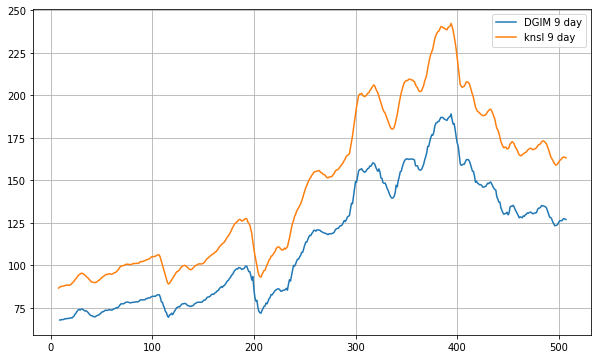

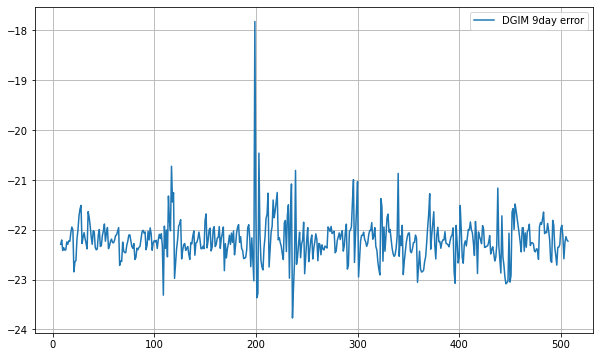

In [22]:
dgim_9day = DGIMMovingAverage(knsl_list_bin, 9, num_buckets, bit_depth, knsl_9day_list, False)
knsl['9-day-dgim'] = dgim_9day.mov_avg
knsl.tail()

plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(range(len(dgim_9day.mov_avg)), dgim_9day.mov_avg, label = "DGIM 9 day")
plt.plot(range(len(dgim_9day.mov_avg)), knsl_9day_list, label = "knsl 9 day")
plt.legend(loc=1)

plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(range(len(dgim_9day.error)), dgim_9day.error, label = "DGIM 9day error")
plt.legend(loc=1)

0 nan 4.0 nan
1 nan 8.142857142857142 nan
2 nan 8.238095238095237 nan
3 nan 12.238095238095237 nan
4 nan 16.428571428571427 nan
5 nan 20.571428571428573 nan
6 nan 20.857142857142858 nan
7 nan 24.80952380952381 nan
8 nan 28.857142857142858 nan
9 nan 33.095238095238095 nan
10 nan 36.904761904761905 nan
11 nan 41.095238095238095 nan
12 nan 45.23809523809524 nan
13 nan 49.476190476190474 nan
14 nan 46.142857142857146 nan
15 nan 50.285714285714285 nan
16 nan 54.142857142857146 nan
17 nan 58.285714285714285 nan
18 nan 62.476190476190474 nan
19 nan 66.80952380952381 nan
20 87.88047608875092 71.14285714285714 -19.045890157661848
21 88.31904747372582 71.47619047619048 -19.070469484564978
22 88.66571408226376 71.9047619047619 -18.90353261233661
23 89.0566664196196 72.23809523809524 -18.88524672850224
24 89.50428553989956 72.71428571428571 -18.75887810771825
25 89.8480951218378 73.04761904761905 -18.69875599636987
26 90.2538092476981 73.47619047619048 -18.589374688288324
27 90.63619050525483 73.8

171 110.17476218087333 88.95238095238095 -19.262470649722584
172 110.72428603399368 89.47619047619048 -19.190094891449363
173 111.41523851667132 90.14285714285714 -19.09288321510091
174 112.14142899286179 90.85714285714286 -18.97985992052389
175 112.88857160295758 91.61904761904762 -18.841166720327887
176 113.7933335077195 92.52380952380952 -18.691362075676512
177 114.66333334786552 91.85714285714286 -19.88969780037116
178 115.64380972726005 92.80952380952381 -19.7453594546822
179 116.53428577241444 93.71428571428571 -19.582219865057596
180 117.38476199195499 94.57142857142857 -19.434663437908526
181 118.26619030180431 95.47619047619048 -19.270088744260615
182 118.96047610328311 96.19047619047619 -19.140811014439535
183 119.66380927676246 96.85714285714286 -19.058950703191794
184 120.47904713948567 97.66666666666667 -18.93472849798336
185 121.37714276994977 98.52380952380952 -18.828366465550232
186 122.08857109433129 93.14285714285714 -23.708782641996315
187 122.42476145426433 93.47619

323 200.6576189313616 160.33333333333334 -20.09606503494985
324 200.32857113792784 159.33333333333334 -20.46399950427887
325 199.77285621279762 158.76190476190476 -20.528790661734387
326 199.53523763020834 158.52380952380952 -20.553476465346872
327 199.16809445335753 158.14285714285714 -20.59829784639926
328 198.68904695056733 161.47619047619048 -18.729193705194625
329 197.78285653250558 161.33333333333334 -18.42906096018578
330 196.54666646321616 160.0952380952381 -18.545940780328603
331 195.33523777553015 158.9047619047619 -18.65023243406415
332 194.0085710797991 157.57142857142858 -18.781202451815023
333 192.61380949474517 156.1904761904762 -18.910032151803037
334 191.2671428862072 153.33333333333334 -19.832893920228774
335 190.038571312314 152.0952380952381 -19.966122116714345
336 189.16761852446058 151.1904761904762 -20.07592136022672
337 188.35571361723402 150.38095238095238 -20.161194214395763
338 187.38761829194567 149.42857142857142 -20.256966393710666
339 186.76095145089286 1

461 167.98095339820497 135.38095238095238 -19.40696272866907
462 167.47714378720238 134.9047619047619 -19.44885203190901
463 167.5509534563337 135.0 -19.427495209579316
464 168.16381109328498 136.38095238095238 -18.899939592057528
465 168.53047761462983 136.71428571428572 -18.878598310921895
466 168.6095254080636 136.8095238095238 -18.86014536935468
467 168.5509534563337 136.8095238095238 -18.831949031384816
468 168.4452391124907 136.71428571428572 -18.837548372034714
469 168.11285836356026 136.38095238095238 -18.87535926251672
470 167.8423817952474 136.0952380952381 -18.914855330602943
471 167.4761919294085 135.71428571428572 -18.965027714811228
472 167.31095377604166 135.71428571428572 -18.884996677534012
473 166.98809669131325 135.38095238095238 -18.927782839987945
474 166.8828590029762 135.23809523809524 -18.962261285514415
475 166.6433352515811 134.8095238095238 -19.1029610599175
476 166.8914308093843 135.1904761904762 -18.99495646071575
477 167.21476454961868 135.52380952380952 -

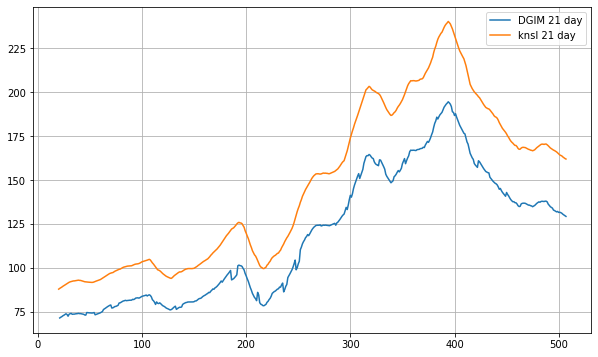

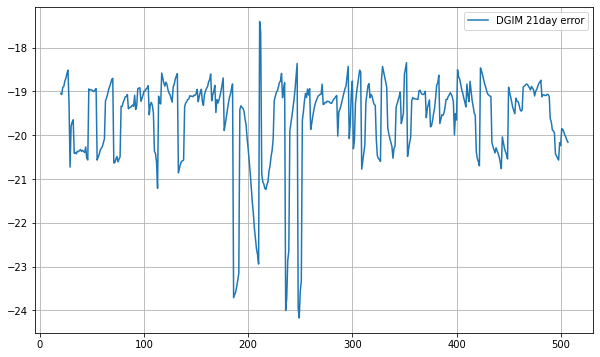

In [23]:
dgim_21day = DGIMMovingAverage(knsl_list_bin, 21, num_buckets, bit_depth, knsl_21day_list, False)
knsl['21-day-dgim'] = dgim_21day.mov_avg
knsl.tail()

plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(range(len(dgim_21day.mov_avg)), dgim_21day.mov_avg, label = "DGIM 21 day")
plt.plot(range(len(dgim_21day.mov_avg)), knsl_21day_list, label = "knsl 21 day")
plt.legend(loc=1)

plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(range(len(dgim_21day.mov_avg)), dgim_21day.error, label = "DGIM 21day error")
plt.legend(loc=1)

In [24]:
knsl.tail()

,High,Low,Open,Close,Volume,3-day,9-day,21-day,Change,position-9-21,system-9-21,position-3-9,system-3-9,Volatility,3-day-dgim,9-day-dgim,21-day-dgim
Date,,,,,,,,,,,,,,,,,
2021-05-28,166.770004,165.190002,165.470001,166.460007,65200.0,165.503337,163.038890,163.712381,0.005361,-1,0.000000,1,0.005361,0.017359,110.666667,126.222222,131.095238
2021-06-01,167.000000,162.009995,167.000000,162.080002,75500.0,164.703339,163.503335,163.144286,-0.026665,1,-0.026665,1,-0.026665,0.017207,110.666667,127.111111,130.523810
2021-06-02,162.535004,160.000000,162.279999,162.199997,129400.0,163.580002,163.817780,162.711905,0.000740,1,0.000740,-1,0.000000,0.017907,109.333333,127.555556,130.095238
2021-06-03,162.199997,160.000000,161.330002,160.449997,96100.0,161.576665,163.534446,162.252858,-0.010848,1,-0.010848,-1,0.000000,0.017695,108.000000,127.222222,129.619048
2021-06-04,161.589996,159.684998,160.500000,160.979996,77100.0,161.209997,163.295556,161.932381,0.003298,1,0.003298,-1,0.000000,0.017763,107.666667,127.000000,129.285714


## 9/21 DGIM Comparison

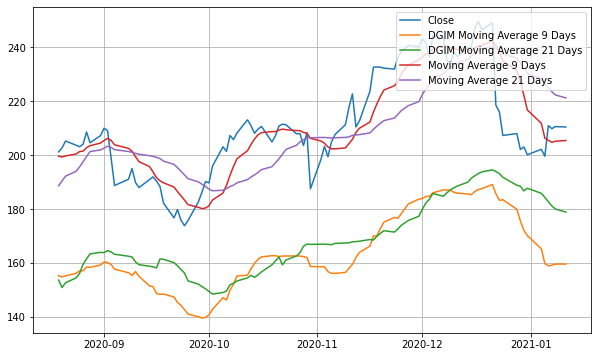

In [25]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(knsl['Close'][-200:-100],label='Close')
plt.plot(knsl['9-day-dgim'][-200:-100],label='DGIM Moving Average 9 Days')
plt.plot(knsl['21-day-dgim'][-200:-100],label='DGIM Moving Average 21 Days')
plt.plot(knsl['9-day'][-200:-100],label='Moving Average 9 Days')
plt.plot(knsl['21-day'][-200:-100],label='Moving Average 21 Days')
plt.legend(loc=1)

<AxesSubplot:xlabel='Date'>

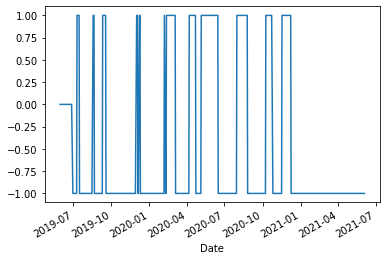

In [26]:
# When the faster moving average is moving above the slower one, indicates time to buy
knsl['position-dgim-9-21'] = np.where(knsl['9-day-dgim'] > knsl['21-day-dgim'], 1,0)
# When the faster moving average is moving below the slower one, indicates time to sell
knsl['position-dgim-9-21'] = np.where(knsl['9-day-dgim'] < knsl['21-day-dgim'],-1,knsl['position-dgim-9-21'])
knsl['position-dgim-9-21'].plot()

,Change,system-dgim-9-21
Date,,
2021-05-28,0.686441,0.515107
2021-06-01,0.659776,0.515107
2021-06-02,0.660516,0.515107
2021-06-03,0.649669,0.515107
2021-06-04,0.652966,0.515107


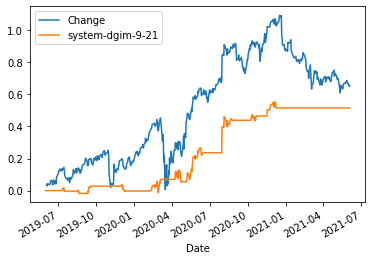

In [27]:
# Whether we are making money with this system
knsl['system-dgim-9-21'] = np.where(knsl['position-dgim-9-21'] > 0, knsl['position-dgim-9-21']* knsl['Change'],0)
knsl[['Change','system-dgim-9-21']].cumsum().plot()
knsl[['Change','system-dgim-9-21']].cumsum().tail()

,system-9-21,system-dgim-9-21
Date,,
2021-05-28,0.608392,0.515107
2021-06-01,0.581727,0.515107
2021-06-02,0.582467,0.515107
2021-06-03,0.571620,0.515107
2021-06-04,0.574917,0.515107


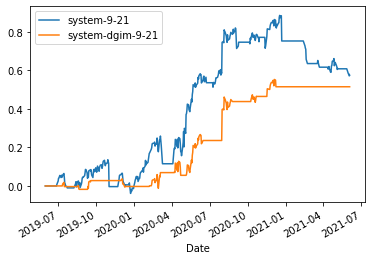

In [28]:
knsl[['system-9-21','system-dgim-9-21']].cumsum().plot()
knsl[['system-9-21','system-dgim-9-21']].cumsum().tail()

## 3/9 DGIM comparison

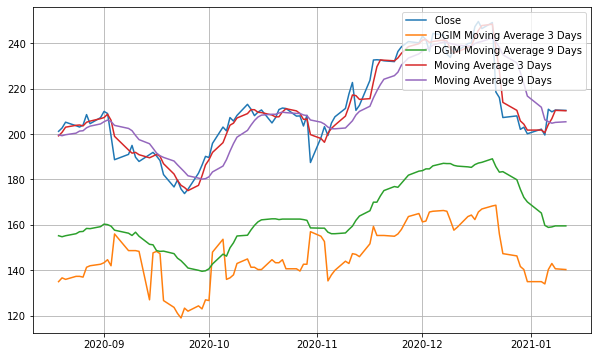

In [29]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(knsl['Close'][-200:-100],label='Close')
plt.plot(knsl['3-day-dgim'][-200:-100],label='DGIM Moving Average 3 Days')
plt.plot(knsl['9-day-dgim'][-200:-100],label='DGIM Moving Average 9 Days')
plt.plot(knsl['3-day'][-200:-100],label='Moving Average 3 Days')
plt.plot(knsl['9-day'][-200:-100],label='Moving Average 9 Days')
plt.legend(loc=1)

<AxesSubplot:xlabel='Date'>

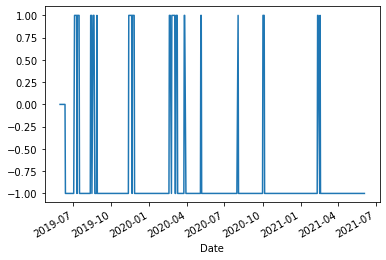

In [30]:
# When the faster moving average is moving above the slower one, indicates time to buy
knsl['position-dgim-3-9'] = np.where(knsl['3-day-dgim'] > knsl['9-day-dgim'], 1,0)
# When the faster moving average is moving below the slower one, indicates time to sell
knsl['position-dgim-3-9'] = np.where(knsl['3-day-dgim'] < knsl['9-day-dgim'],-1,knsl['position-dgim-3-9'])
knsl['position-dgim-3-9'].plot()

,Change,system-dgim-3-9
Date,,
2021-05-28,0.686441,0.274546
2021-06-01,0.659776,0.274546
2021-06-02,0.660516,0.274546
2021-06-03,0.649669,0.274546
2021-06-04,0.652966,0.274546


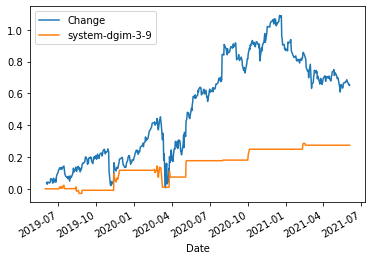

In [31]:
# Whether we are making money with this system
knsl['system-dgim-3-9'] = np.where(knsl['position-dgim-3-9'] > 0, knsl['position-dgim-3-9']* knsl['Change'],0)
knsl[['Change','system-dgim-3-9']].cumsum().plot()
knsl[['Change','system-dgim-3-9']].cumsum().tail()

,system-3-9,system-dgim-3-9
Date,,
2021-05-28,1.450044,0.274546
2021-06-01,1.423379,0.274546
2021-06-02,1.423379,0.274546
2021-06-03,1.423379,0.274546
2021-06-04,1.423379,0.274546


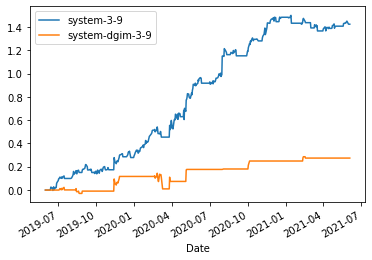

In [32]:
knsl[['system-3-9','system-dgim-3-9']].cumsum().plot()
knsl[['system-3-9','system-dgim-3-9']].cumsum().tail()

## Pandas 9/21 vs DGIM 3/9

,system-9-21,system-dgim-3-9
Date,,
2021-05-28,0.608392,0.274546
2021-06-01,0.581727,0.274546
2021-06-02,0.582467,0.274546
2021-06-03,0.571620,0.274546
2021-06-04,0.574917,0.274546


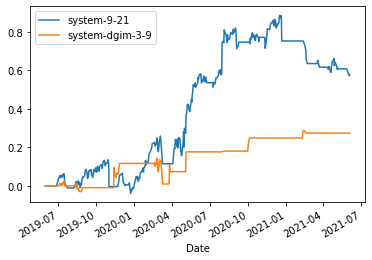

In [33]:
knsl[['system-9-21','system-dgim-3-9']].cumsum().plot()
knsl[['system-9-21','system-dgim-3-9']].cumsum().tail()

## Normalizing DGIM

<AxesSubplot:xlabel='Date'>

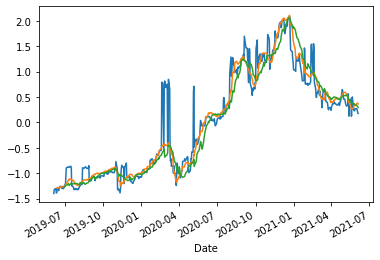

In [34]:
from sklearn import preprocessing

df3 = knsl['3-day-dgim']
df9 = knsl['9-day-dgim']
df21 = knsl['21-day-dgim']

knsl['3-day-dgim-norm']=(df3-df3.mean())/df3.std()
knsl['9-day-dgim-norm']=(df9-df9.mean())/df9.std()
knsl['21-day-dgim-norm']=(df21-df21.mean())/df21.std()

knsl['3-day-dgim-norm'].plot()
knsl['9-day-dgim-norm'].plot()
knsl['21-day-dgim-norm'].plot()

<AxesSubplot:xlabel='Date'>

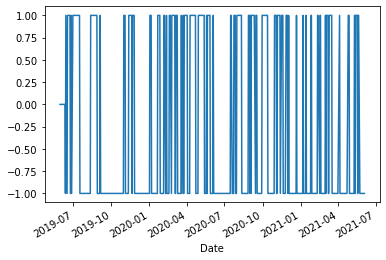

In [35]:
# When the faster moving average is moving above the slower one, indicates time to buy
knsl['position-dgim-3-9-norm'] = np.where(knsl['3-day-dgim-norm'] > knsl['9-day-dgim-norm'], 1,0)
# When the faster moving average is moving below the slower one, indicates time to sell
knsl['position-dgim-3-9-norm'] = np.where(knsl['3-day-dgim-norm'] < knsl['9-day-dgim-norm'],-1,knsl['position-dgim-3-9-norm'])
knsl['position-dgim-3-9-norm'].plot()

,Change,system-dgim-3-9-norm
Date,,
2021-05-28,0.686441,0.37916
2021-06-01,0.659776,0.37916
2021-06-02,0.660516,0.37916
2021-06-03,0.649669,0.37916
2021-06-04,0.652966,0.37916


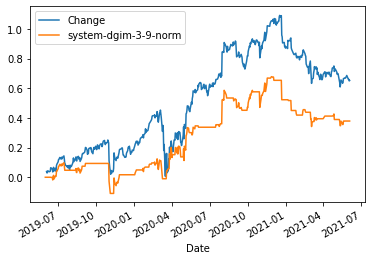

In [36]:
# Whether we are making money with this system
knsl['system-dgim-3-9-norm'] = np.where(knsl['position-dgim-3-9-norm'] > 0, knsl['position-dgim-3-9-norm']* knsl['Change'],0)
knsl[['Change','system-dgim-3-9-norm']].cumsum().plot()
knsl[['Change','system-dgim-3-9-norm']].cumsum().tail()

,system-dgim-3-9-norm,system-dgim-3-9
Date,,
2021-05-28,0.37916,0.274546
2021-06-01,0.37916,0.274546
2021-06-02,0.37916,0.274546
2021-06-03,0.37916,0.274546
2021-06-04,0.37916,0.274546


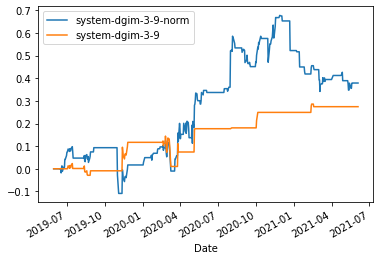

In [37]:
knsl[['system-dgim-3-9-norm','system-dgim-3-9']].cumsum().plot()
knsl[['system-dgim-3-9-norm','system-dgim-3-9']].cumsum().tail()

,system-dgim-3-9-norm,system-3-9
Date,,
2021-05-28,0.37916,1.450044
2021-06-01,0.37916,1.423379
2021-06-02,0.37916,1.423379
2021-06-03,0.37916,1.423379
2021-06-04,0.37916,1.423379


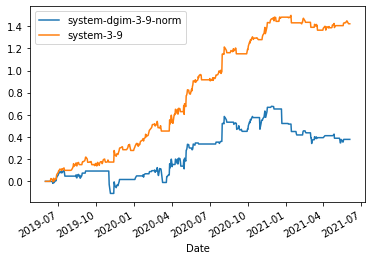

In [38]:
knsl[['system-dgim-3-9-norm','system-3-9']].cumsum().plot()
knsl[['system-dgim-3-9-norm','system-3-9']].cumsum().tail()

<AxesSubplot:xlabel='Date'>

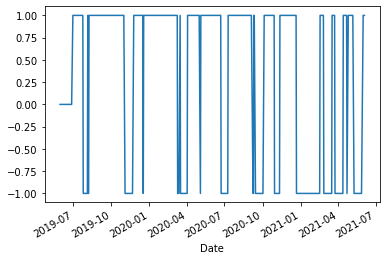

In [39]:
# When the faster moving average is moving above the slower one, indicates time to buy
knsl['position-dgim-9-21-norm'] = np.where(knsl['9-day-dgim-norm'] > knsl['21-day-dgim-norm'], 1,0)
# When the faster moving average is moving below the slower one, indicates time to sell
knsl['position-dgim-9-21-norm'] = np.where(knsl['9-day-dgim-norm'] < knsl['21-day-dgim-norm'],-1,knsl['position-dgim-9-21-norm'])
knsl['position-dgim-9-21-norm'].plot()

,Change,system-dgim-9-21-norm
Date,,
2021-05-28,0.686441,0.508255
2021-06-01,0.659776,0.481590
2021-06-02,0.660516,0.482330
2021-06-03,0.649669,0.471482
2021-06-04,0.652966,0.474780


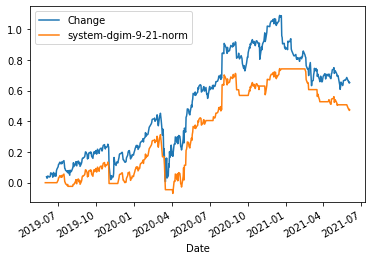

In [40]:
# Whether we are making money with this system
knsl['system-dgim-9-21-norm'] = np.where(knsl['position-dgim-9-21-norm'] > 0, knsl['position-dgim-9-21-norm']* knsl['Change'],0)
knsl[['Change','system-dgim-9-21-norm']].cumsum().plot()
knsl[['Change','system-dgim-9-21-norm']].cumsum().tail()

,system-dgim-9-21-norm,system-dgim-9-21
Date,,
2021-05-28,0.508255,0.515107
2021-06-01,0.481590,0.515107
2021-06-02,0.482330,0.515107
2021-06-03,0.471482,0.515107
2021-06-04,0.474780,0.515107


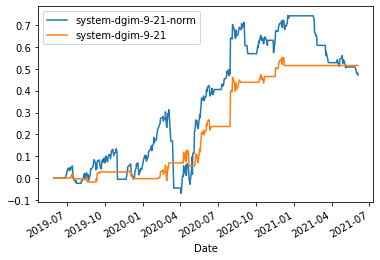

In [41]:
knsl[['system-dgim-9-21-norm','system-dgim-9-21']].cumsum().plot()
knsl[['system-dgim-9-21-norm','system-dgim-9-21']].cumsum().tail()

,system-dgim-9-21-norm,system-9-21
Date,,
2021-05-28,0.508255,0.608392
2021-06-01,0.481590,0.581727
2021-06-02,0.482330,0.582467
2021-06-03,0.471482,0.571620
2021-06-04,0.474780,0.574917


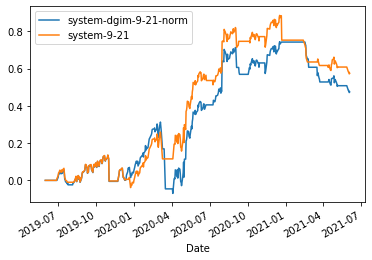

In [42]:
knsl[['system-dgim-9-21-norm','system-9-21']].cumsum().plot()
knsl[['system-dgim-9-21-norm','system-9-21']].cumsum().tail()

,system-dgim-3-9-norm,system-dgim-9-21-norm
Date,,
2021-05-28,0.37916,0.508255
2021-06-01,0.37916,0.481590
2021-06-02,0.37916,0.482330
2021-06-03,0.37916,0.471482
2021-06-04,0.37916,0.474780


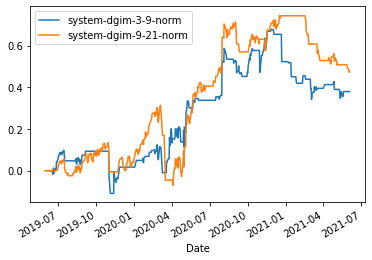

In [43]:
knsl[['system-dgim-3-9-norm','system-dgim-9-21-norm']].cumsum().plot()
knsl[['system-dgim-3-9-norm','system-dgim-9-21-norm']].cumsum().tail()

## Winning Method: 3-9 Moving Average
### Runner Up: Single Purchase

,Change,system-dgim-3-9-norm,system-3-9,system-dgim-9-21-norm,system-9-21
Date,,,,,
2021-05-28,0.686441,0.37916,1.450044,0.508255,0.608392
2021-06-01,0.659776,0.37916,1.423379,0.481590,0.581727
2021-06-02,0.660516,0.37916,1.423379,0.482330,0.582467
2021-06-03,0.649669,0.37916,1.423379,0.471482,0.571620
2021-06-04,0.652966,0.37916,1.423379,0.474780,0.574917


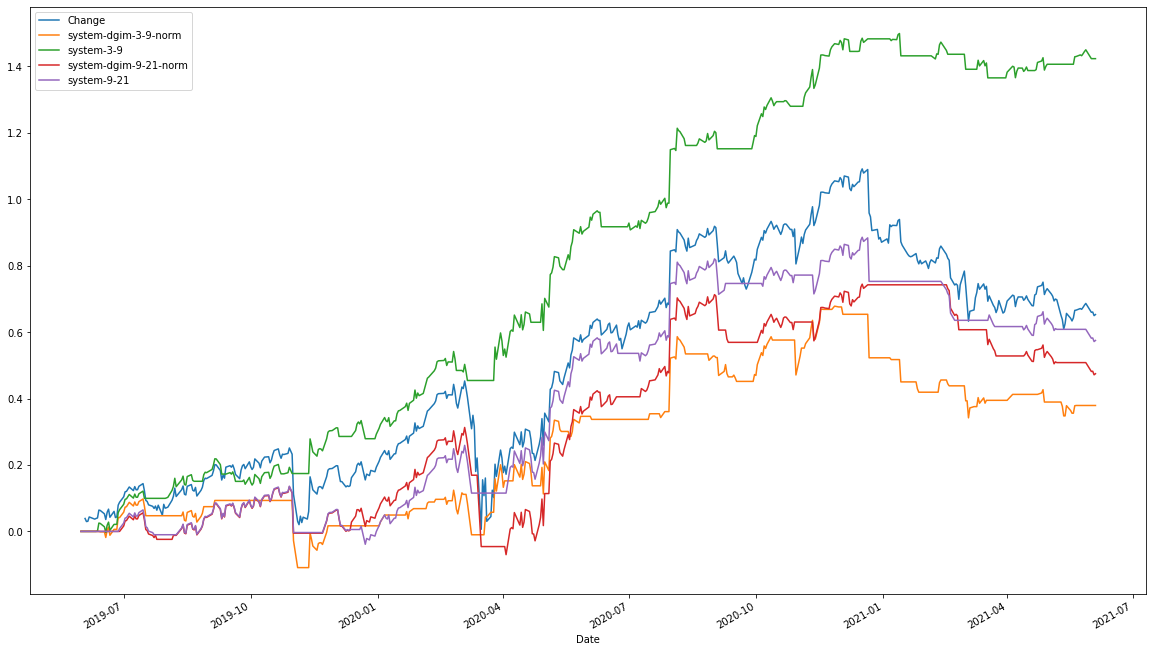

In [44]:
knsl[['Change','system-dgim-3-9-norm','system-3-9','system-dgim-9-21-norm','system-9-21']].cumsum().plot(figsize=(20,12))
knsl[['Change','system-dgim-3-9-norm','system-3-9','system-dgim-9-21-norm','system-9-21']].cumsum().tail()